# Tarea Regresión Lineal

* **Nombre**: Fatima Ginebra Zarandona
* **CU**: 190874
* **Usuario GitHub**: fginebraz

<div class="alert alert-warning">
Fecha límite de entrega: 03 de octubre, 2021 23:59
</div>

In [1]:
import numpy as np
import sympy as sp
from ipywidgets import interact, fixed, widgets
%pylab inline 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [70]:
#Usando el código que utilizamos para la clase para hacer los ejercicios de la tarea

def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x
    
    _beta = rl.historia['beta'][iteracion]

    fig, ax = plt.subplots(1,2, figsize=(10,6))
    ax[0].scatter(x,y, label="datos")
    ax[0].plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    ax[0].set_xlabel('Edad (yr)')
    ax[0].set_ylabel('Altura (m)')
    ax[0].legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))
    
    costo  = rl.historia['costo']
    
    iteraciones = [i for i in range(0, len(costo))]
    ax[1].plot(iteraciones, costo, 'g', label="costo")
    ax[1].plot(iteracion, costo[iteracion], 'or', label="iteracion")
    ax[1].set_xlabel('Iteraciones')
    ax[1].set_ylabel('Costo')
    ax[1].legend(loc="best")
    
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

Lo que haremos es probar el casi de la derivada

In [2]:
#Declaración de todas nuestras variables como símbolos de Sympy

J = sp.Function("J")
b0,b1,b,bj = sp.symbols("beta_0,beta_1,beta,beta_j")
m,n,y,i,j,x = sp.symbols("m,n,y,i,j,x")

#La suma por sí sola que aparece en la ecuación:
sigma = sp.Sum((sp.Indexed(y, i) - b0 - b1*sp.Indexed(x, i))**2, (i, 1, m))/(2*m)

#La función de costo completa (con la suma de arriba) expresada como una ecuación
f_costo= sp.Eq(J(b0,b1), sigma)

In [3]:
f_costo

Eq(J(beta_0, beta_1), Sum((-beta_0 - beta_1*x[i] + y[i])**2, (i, 1, m))/(2*m))

La función

In [4]:
#Caso 1: Derivar respecto a b0
diff_b0 = sp.simplify(sp.Eq(sp.Derivative(f_costo.lhs,b0),sp.Derivative(f_costo.rhs,b0)).doit())
diff_b0

Eq(Derivative(J(beta_0, beta_1), beta_0), Sum(beta_0 + beta_1*x[i] - y[i], (i, 1, m))/m)

In [5]:
#Caso 2: Derivar respecto a b0
diff_b1 = sp.simplify(sp.Eq(sp.Derivative(f_costo.lhs,b1),sp.Derivative(f_costo.rhs,b1)).doit())
diff_b1

Eq(Derivative(J(beta_0, beta_1), beta_1), Sum((beta_0 + beta_1*x[i] - y[i])*x[i], (i, 1, m))/m)

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal.

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

**Resolución: Para la siguiente sección de código utilicé esta página: https://likegeeks.com/numpy-loadtxt-tutorial/#Specifying_the_file_path porque moví los archivos de datos al mismo directorio en el que estuve trabajando para hacer la tarea, por facilidad.**

In [38]:
edad = np.loadtxt('./edad.dat') #el archivo está almacenado en mismo directorio que este código, lo cambié de directorio
altura = np.loadtxt('./altura.dat') #el archivo está almacenado en mismo directorio que este código, lo cambié de directorio

def J_function_beta(b0, b1):
    cost = 0
    for i in range(0, len(altura)):
        cost += (altura[i]-b0-b1*edad[i])**2/(2*len(altura))
    return cost

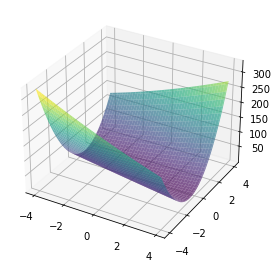

In [48]:
x = 0.03
y = 0.03
beta_0 = np.arange(-4,4,x)
beta_1 = np.arange(-4,4,y)
B0, B1 = np.meshgrid(beta_0,beta_1)
cost = J_function_beta(B0,B1)

figura_graficada = plt.figure(figsize=(10, 10))
ax = figura_graficada.add_subplot(2,2,2, projection = '3d')
ax.plot_surface(B0,B1, cost, alpha = .666666666666, cmap = 'viridis')

#alpha tiene un valor relativamente bajo, por lo que la gráfica es bastante transparente

Para la gráfica de contorno también utilicé https://sodocumentation.net/matplotlib/topic/8644/contour-maps

TypeError: __init__() got an unexpected keyword argument 'i'

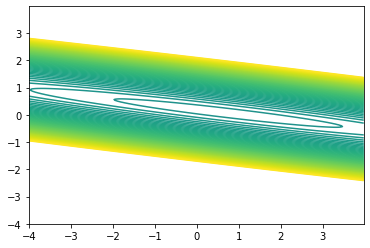

In [119]:
#Grafica de contorno
figura = plt.figure()
plt.contour(B0,B1,cost, levels= np.arange(-50,50,.8), cmap="viridis")

p2 = RegresionLineal(alpha=0.003, max_iters=10000000, tols=0, i=19723)
p2.gradientDescent(edad, altura)

end = [p2.historia['beta0'][p2.i-1][0], p2.historia['beta1'][p2.i-1][1], p2.historia["costo"][p2.i-1]]
end

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [10]:
%cat ./chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

Text(0.5, 0, 'Chirps per Second')

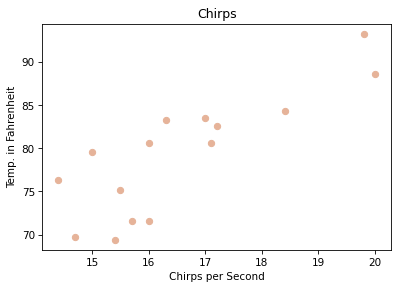

In [58]:
chirps, temperatura = np.loadtxt('./chirps.txt', unpack = True, dtype = float, delimiter=' ', usecols = [0,1])
plt.figure(dpi=75)
plt.subplot(1, 1, 1)

plt.scatter(chirps, temperatura, color = (.9, .7, .6), alpha = 1, label = 'Chirps')
plt.title('Chirps')
plt.ylabel('Temp. in Fahrenheit')
plt.xlabel('Chirps per Second')

In [117]:
chirps1 = RegresionLineal(alpha = 0.002, max_iters=1000000, tols=0.0000001)
chirps1.gradientDescent(chirps, temperatura)
plotModelo(chirps, temperatura, chirps1, 130944)

AttributeError: 'RegresionLineal' object has no attribute 'shape'

Text(0, 0.5, 'Second')

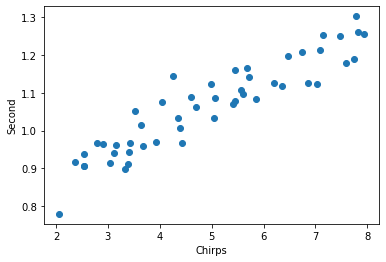

In [118]:
chirpsy = np.loadtxt('./chirps.txt', dtype="float", delimiter="\t", skiprows=1)
chirps = datos[:,0]
time_in_seconds = datos[:,1]
plt.scatter(X,Y)
plt.xlabel('Chirps')
plt.ylabel('Second')

**Respuesta:** Los valores de la regresion linear son casi exactamente iguales a los de la página web. Logre encontrar el mejor modelo (y su alpha) con prueba y error buscando un modelo que convergía con tolerancia de 0.


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

## Problema 5

Use el archivo `radioactive_decay.dat`

In [13]:
%cat ./radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'Tiempo sobrante')

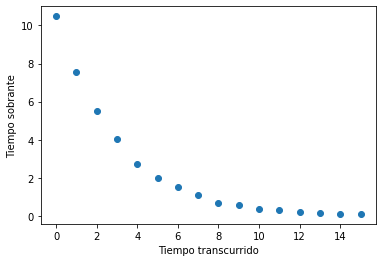

In [65]:
datos_decay = np.loadtxt('./radioactive_decay.txt', dtype="float", delimiter="\t", skiprows=1)
residuo = datos_decay[:,1]
tiempo_transcurrido = datos_decay[:,0]
plt.scatter(tiempo_transcurrido,residuo)
plt.xlabel('Tiempo transcurrido')
plt.ylabel('Tiempo sobrante')

La función convergió con beta: [ 6.45690921 -0.54933799] en la iteración 54267


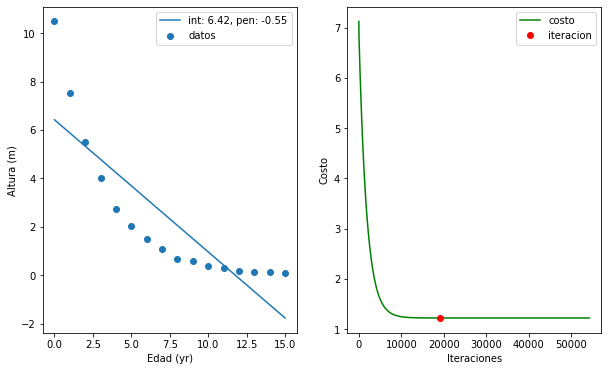

In [82]:
radioactivo = RegresionLineal(alpha=0.001, tols=0.00, max_iters=1000000)
radioactivo.gradientDescent(tiempo_transcurrido,residuo)

plotModelo(tiempo_transcurrido,residuo,radioactivo,19031)

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.